<a href="https://colab.research.google.com/github/Matteomtt/exercice-prise-en-main/blob/main/Exercice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import pandas as pd
from google.colab import files

1 - Exploration

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
uploaded = files.upload()


KeyboardInterrupt: ignored

In [7]:
from google.colab import drive
drive.mount ('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [10]:
import os
os.chdir('/content/gdrive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110')

In [16]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [21]:
path = 'cats_and_dogs/train/cats'
num_cats_train = len(os.listdir(path))

print('Le nombre de chats dans le dossier cats est:', num_cats_train)

path2 = 'cats_and_dogs/train/dogs'
num_dogs_train = len(os.listdir(path2))

print('Le nombre de chien dans le dossier dogs est:', num_dogs_train)

path3 = 'cats_and_dogs/test/cats'
num_cats_test = len(os.listdir(path3))

print('Le nombre de chats dans le dossier cats est:', num_cats_test)

path4 = 'cats_and_dogs/test/dogs'
num_dogs_test = len(os.listdir(path4))

print('Le nombre de chiens dans le dossier dogs est:', num_dogs_test)

Le nombre de chats dans le dossier cats est: 279
Le nombre de chien dans le dossier dogs est: 278
Le nombre de chats dans le dossier cats est: 70
Le nombre de chiens dans le dossier dogs est: 70


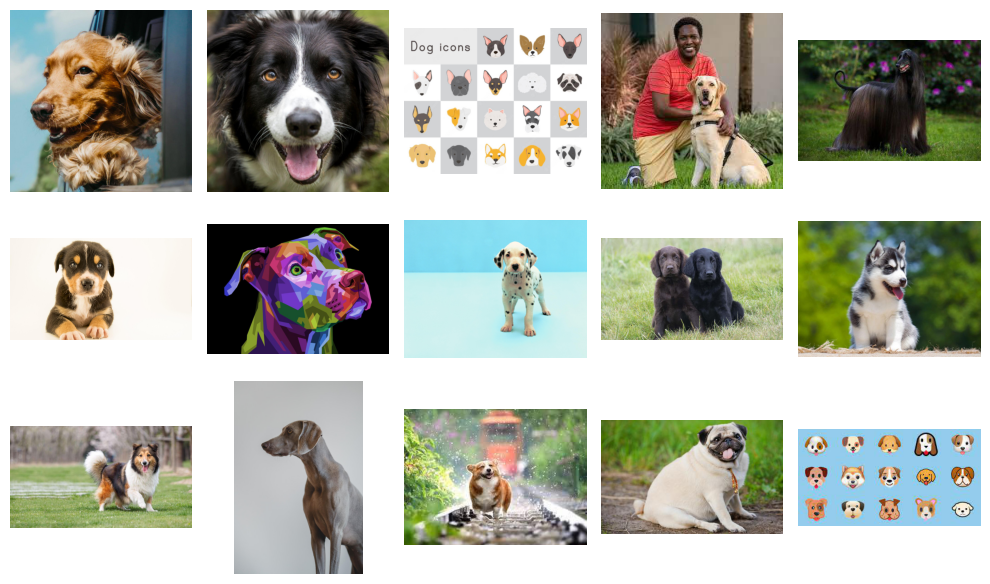

In [23]:
from PIL import Image

# Chemin vers le dossier contenant les images de chats
path = 'cats_and_dogs/train/dogs'

# Obtention des chemins des fichiers image
image_paths = [os.path.join(path, f) for f in os.listdir(path)[:15]]

# Chargement des images
images = [Image.open(p) for p in image_paths]

# Tracé des images
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))
axes = axes.flatten()
for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].axis('off')
plt.tight_layout()
plt.show()


2 - Install the necessary libraries

3 - Split your data into train and validation


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_generator = test_datagen.flow_from_directory(
    'cats_and_dogs/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


4 - Build & Train your Model

In [48]:
#history = model.fit(train_generator, epochs=10, validation_data=train_datagen, verbose=2)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

#x_train = np.asarray(x_train)
#y_train = np.asarray(y_train)
#validation_x = np.asarray(validation_x)
#validation_y = np.asarray(validation_y)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(test_generator, epochs=10, validation_data=test_datagen, verbose=2)

#plt.plot(history.history['accuracy'])


Epoch 1/10


ValueError: ignored

5 - Evaluate your model


In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Get the predicted labels for the test data
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Get the true labels for the test data
y_true = test_generator.classes

# Get the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cm)

# Plot the accuracy and loss over the epochs
acc = history.history['accuracy']       #lié au problème du code précédent.
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


5/5 [==============================] - 4s 656ms/step - loss: 1.0546 - accuracy: 0.5000
Test loss: 1.0545958280563354
Test accuracy: 0.5
5/5 [==============================] - 5s 1s/step
Confusion matrix:
[[70  0]
 [70  0]]


NameError: ignored

In [51]:
import requests

url = "https://www.ecosia.org/images?q=kiwi%20image#id=5A6E246B4F11D7AD30527DBA5F6DE1320269D1A5"
response = requests.get(url)
with open("image.jpg", "wb") as f:
    f.write(response.content)


from tensorflow.keras.preprocessing.image import load_img

img = load_img("image.jpg", target_size=(150, 150))


UnidentifiedImageError: ignored